In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data paths
train_data_dir = 'Malariadataset/Train'
test_data_dir = 'Malariadataset/Test'


In [2]:
# Define image size and channels
img_width, img_height = 128, 128
channels = 3  # RGB images

# Define batch size and epochs
batch_size = 32
epochs = 10

In [4]:
# Create a CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, channels), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

In [5]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [6]:
# Create data generators for training and testing
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height),
                                                    batch_size=batch_size, class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_data_dir, target_size=(img_width, img_height),
                                                  batch_size=batch_size, class_mode='binary')


Found 416 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [7]:
# Train the model
model.fit_generator(train_generator, steps_per_epoch=train_generator.samples // batch_size,
                    epochs=epochs, validation_data=test_generator,
                    validation_steps=test_generator.samples // batch_size)


C:\Users\hp\AppData\Local\Temp\ipykernel_3768\84245086.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=train_generator.samples // batch_size,


Epoch 1/10


13/13 [==============================] - 66s 4s/step - loss: 0.8430 - accuracy: 0.5337 - val_loss: 0.6623 - val_accuracy: 0.6719
Epoch 2/10
13/13 [==============================] - 43s 3s/step - loss: 0.6881 - accuracy: 0.5288 - val_loss: 0.6886 - val_accuracy: 0.6797
Epoch 3/10
13/13 [==============================] - 42s 3s/step - loss: 0.6427 - accuracy: 0.5745 - val_loss: 0.7297 - val_accuracy: 0.3672
Epoch 4/10
13/13 [==============================] - 51s 4s/step - loss: 0.6145 - accuracy: 0.6587 - val_loss: 0.7535 - val_accuracy: 0.3047
Epoch 5/10
13/13 [==============================] - 40s 3s/step - loss: 0.5419 - accuracy: 0.7163 - val_loss: 0.9248 - val_accuracy: 0.4453
Epoch 6/10
13/13 [==============================] - 45s 3s/step - loss: 0.4490 - accuracy: 0.7740 - val_loss: 0.7026 - val_accuracy: 0.5391
Epoch 7/10
13/13 [==============================] - 40s 3s/step - loss: 0.4167 - accuracy: 0.8341 - val_loss: 0.6483 - val_accuracy: 0.6172
Epoch 8/10
13/13 [

In [9]:
# Save the model in the native Keras format
model.save('malaria_detection_model.keras')

In [11]:
# Load the pre-trained model for prediction
loaded_model = tf.keras.models.load_model('malaria_detection_model.keras')

# Use the loaded model for prediction
# For example, you can use the test data generator for prediction
predictions = loaded_model.predict(test_generator)

5/5 [==============================] - 1s 84ms/step


5/5 [==============================] - 0s 66ms/step - loss: 0.7989 - accuracy: 0.5896
Test Loss: 0.7989147901535034
Test Accuracy: 0.5895522236824036
5/5 [==============================] - 0s 64ms/step
Confusion Matrix:
[[36 55]
 [ 0 43]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.40      0.57        91
           1       0.44      1.00      0.61        43

    accuracy                           0.59       134
   macro avg       0.72      0.70      0.59       134
weighted avg       0.82      0.59      0.58       134



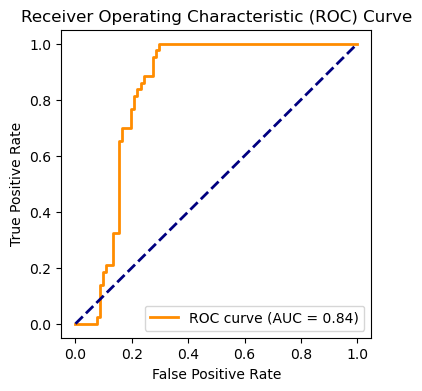

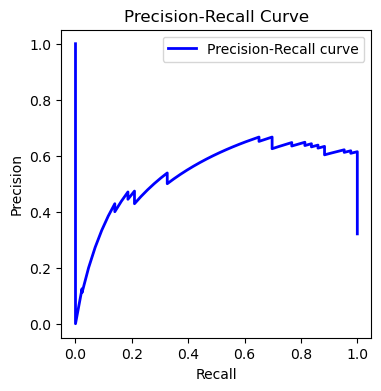

In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Evaluate the model on test data
eval_result = loaded_model.evaluate(test_generator)

# Print the evaluation result
print("Test Loss:", eval_result[0])
print("Test Accuracy:", eval_result[1])

# Generate predictions on test data
y_true = test_generator.classes
y_pred_prob = loaded_model.predict(test_generator).ravel()

# Convert probabilities to binary predictions
y_pred = np.round(y_pred_prob)

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_true, y_pred)
print("Classification Report:")
print(class_report)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-recall curve
precision, recall, _ = precision_recall_curve(y_true, y_pred_prob)

plt.figure(figsize=(4, 4))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()


Found 134 images belonging to 2 classes.
5/5 [==============================] - 1s 79ms/step


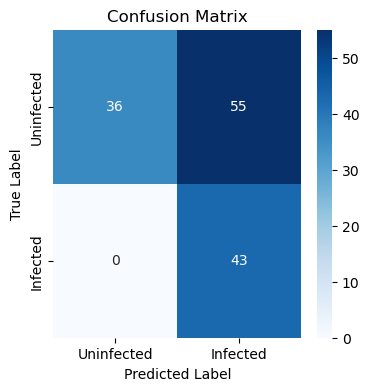

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your model and test data
loaded_model = tf.keras.models.load_model('malaria_detection_model.keras')
test_generator = test_datagen.flow_from_directory(test_data_dir, target_size=(img_width, img_height),
                                                  batch_size=batch_size, class_mode='binary', shuffle=False)

# Generate predictions on test data
y_true = test_generator.classes
y_pred_prob = loaded_model.predict(test_generator).ravel()

# Convert probabilities to binary predictions
y_pred = np.round(y_pred_prob)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Uninfected', 'Infected'],
            yticklabels=['Uninfected', 'Infected'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


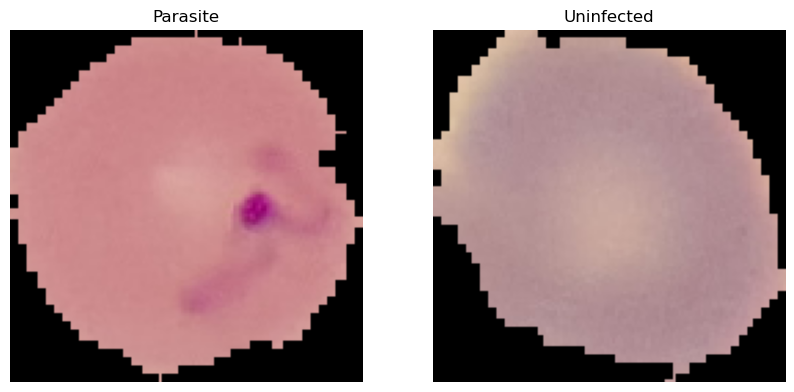

In [20]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

# Path to the dataset folder
dataset_folder = 'Malariadataset/Train'

# List all files in the 'Parasite' subfolder
parasite_folder = os.path.join(dataset_folder, 'Parasite')
parasite_file_list = os.listdir(parasite_folder)

# List all files in the 'Uninfected' subfolder
uninfected_folder = os.path.join(dataset_folder, 'Uninfected')
uninfected_file_list = os.listdir(uninfected_folder)

# Choose a specific image file from both classes
parasite_image_file = parasite_file_list[0]
uninfected_image_file = uninfected_file_list[0]

# Load and display the 'Parasite' image
parasite_img_path = os.path.join(parasite_folder, parasite_image_file)
parasite_img = image.load_img(parasite_img_path, target_size=(img_width, img_height))

# Load and display the 'Uninfected' image
uninfected_img_path = os.path.join(uninfected_folder, uninfected_image_file)
uninfected_img = image.load_img(uninfected_img_path, target_size=(img_width, img_height))

# Display the images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(parasite_img)
plt.title('Parasite')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(uninfected_img)
plt.title('Uninfected')
plt.axis('off')

plt.show()
